In [2555]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

RSEED = 12

PATH = 'D:\\DA\\Kaggle\\House Prices\\'

In [2556]:
data_train = pd.read_csv(PATH + 'train.csv')
data_test = pd.read_csv(PATH + 'test.csv')
data_subm = pd.read_csv(PATH + 'sample_submission.csv')

In [2557]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2558]:
data_subm.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [2559]:
y = data_train['SalePrice']

# Exploratory Data Analysis & New Features Generation

In [2560]:
data_train.shape, data_test.shape, data_subm.shape

((1460, 81), (1459, 80), (1459, 2))

In [2561]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2562]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [2563]:
data_train.groupby('YrSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


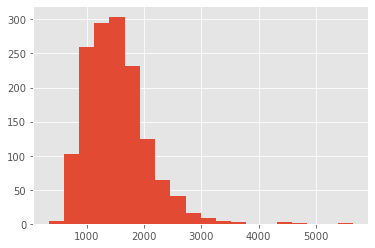

In [2564]:
data_train['GrLivArea'].hist(bins=20);

In [2565]:
livarea_perc = []
for i in range(10):
    livarea_perc.append(np.percentile(data_train['GrLivArea'], (i+1)*10))
livarea_perc

[912.0,
 1066.6000000000001,
 1208.0,
 1339.0,
 1464.0,
 1578.0,
 1709.3,
 1869.0,
 2158.3,
 5642.0]

In [2566]:
def get_livarea_range(area):
    for i in range(len(livarea_perc)):
        if(area <= livarea_perc[i]):
            return i+1
    return len(livarea_perc)

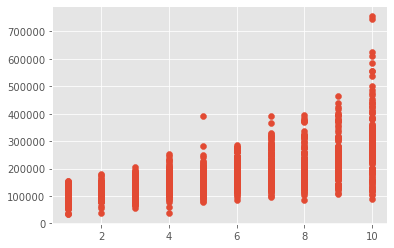

In [2567]:
plt.scatter(data_train['GrLivArea'].map(get_livarea_range), data_train['SalePrice']);

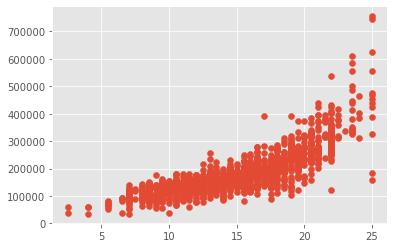

In [2568]:
plt.scatter(data_train['GrLivArea'].map(get_livarea_range) + 1.5*data_train['OverallQual'], data_train['SalePrice']);

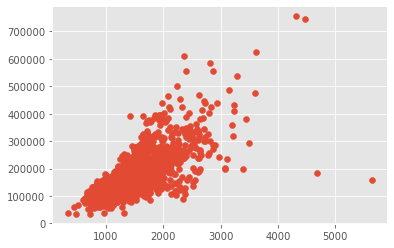

In [2569]:
plt.scatter(data_train['GrLivArea'], data_train['SalePrice']);

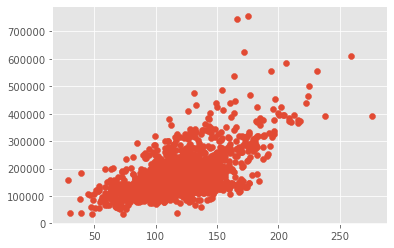

In [2570]:
plt.scatter(data_train['SalePrice'] / data_train['GrLivArea'], data_train['SalePrice']);

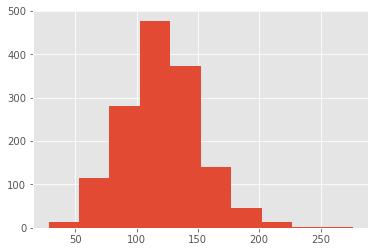

In [2571]:
(data_train['SalePrice'] / data_train['GrLivArea']).hist();

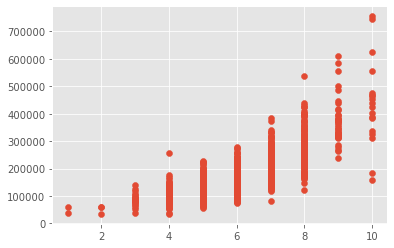

In [2572]:
plt.scatter(data_train['OverallQual'], data_train['SalePrice']);

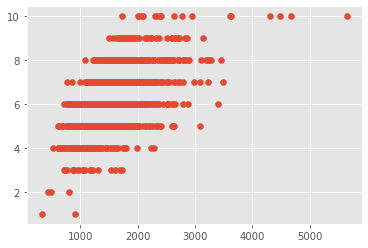

In [2573]:
plt.scatter(data_train['GrLivArea'], data_train['OverallQual']);

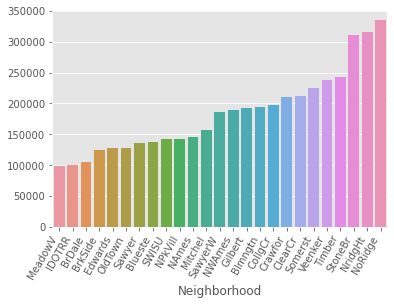

In [2574]:
bar = sns.barplot(x=data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().index, \
           y=data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().values)
labels = data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().index
bar.set_xticklabels(labels, rotation=60, ha='right');

In [2575]:
district_mean = dict(data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values())

In [2576]:
data_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
data_test.drop(['Id'], axis=1, inplace=True)

In [2577]:
data_train.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
CentralAir        0
SaleType          0
Heating           0
TotalBsmtSF       0
MSSubClass        0
Length: 79, dtype: int64

In [2578]:
data_all = pd.concat((data_train, data_test))

In [2579]:
subj_col_names = ['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC']
uniqvalues = set()
for col in subj_col_names:
    for val in data_all[col].unique():
        if val not in uniqvalues:
            uniqvalues.add(val)
print(uniqvalues)

{nan, 'Av', 'Gd', 'Ex', 'Fa', 'Mn', 'No', 'TA', 'Po'}


In [2580]:
subj_dict = {'Av': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2, 'Mn': 2, 'No': 0, 'TA': 3, 'Po': 1}
for col in subj_col_names:
    data_train[col] = data_train[col].map(subj_dict)
    data_test[col] = data_test[col].map(subj_dict)   

In [2581]:
livarea_perc = []
for i in range(10):
    livarea_perc.append(np.percentile(data_all['GrLivArea'], (i+1)*10))
livarea_perc

[923.8,
 1064.6,
 1200.0,
 1329.2,
 1444.0,
 1560.0,
 1680.0,
 1838.4,
 2153.2000000000003,
 5642.0]

In [2582]:
def get_livarea_range(area):
    for i in range(len(livarea_perc)):
        if(area <= livarea_perc[i]):
            return i+1
    return len(livarea_perc)

In [2583]:
data_train['AreaQualityMix'] = data_train['GrLivArea'].map(get_livarea_range) + 2 * data_train['OverallQual']
data_test['AreaQualityMix'] = data_test['GrLivArea'].map(get_livarea_range) + 2 * data_test['OverallQual']

In [2584]:
data_train['Neighborhood'] = data_train['Neighborhood'].map(district_mean)
data_test['Neighborhood'] = data_test['Neighborhood'].map(district_mean)

In [2585]:
cat_col_names = list(data_test.dtypes[data_test.dtypes=='object'].index) + ['MSSubClass']
num_col_names = list(set(data_test.columns) - set(cat_col_names))
cat_col_inds = [data_test.columns.get_loc(col_name) for col_name in cat_col_names]

In [2586]:
data_train[num_col_names].head()

,YearRemodAdd,LowQualFinSF,OpenPorchSF,GarageCond,KitchenAbvGr,KitchenQual,2ndFlrSF,Neighborhood,EnclosedPorch,TotRmsAbvGrd,...,1stFlrSF,LotFrontage,YrSold,BsmtHalfBath,MiscVal,Fireplaces,BsmtUnfSF,MoSold,GarageArea,GarageQual
0,2003,0,61,3.0,1,4,854,197965.773333,0,8,...,856,65.0,2008,0,0,0,150,2,548,3.0
1,1976,0,0,3.0,1,3,0,238772.727273,0,6,...,1262,80.0,2007,1,0,1,284,5,460,3.0
2,2002,0,42,3.0,1,4,866,197965.773333,0,6,...,920,68.0,2008,0,0,1,434,9,608,3.0
3,1970,0,35,3.0,1,4,756,210624.725490,272,7,...,961,60.0,2006,0,0,1,540,2,642,3.0
4,2000,0,84,3.0,1,4,1053,335295.317073,0,9,...,1145,84.0,2008,0,0,1,490,12,836,3.0


In [2587]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_col_names:
    enc.fit(data_all[col].astype(str))
    data_train[col] = enc.transform(data_train[col].astype(str))
    data_test[col] = enc.transform(data_test[col].astype(str))

In [2588]:
from scipy.spatial import distance
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Returns mean target value of count closest objects for each object in (X_train_sc, X_test_sc)
# Version 2
def get_mean_target(X_train, X_test, num_cols, target, count):
    train_size, test_size = X_train.shape[0], X_test.shape[0]
    X_train_df = pd.DataFrame()
    X_test_df = pd.DataFrame()
    cat_cols = list(set(X_test.columns.values.tolist()) - set(num_cols))
    X_all_cat_df = pd.concat([X_train[cat_cols], X_test[cat_cols]])
    
    for col in num_cols:  
        X_train_df[col] = X_train[col].fillna(X_train[col].median())
        X_test_df[col] = X_test[col].fillna(X_test[col].median())
    
    scaler = StandardScaler()
    X_num_all = pd.concat((X_train_df, X_test_df), axis=0)
    scaler.fit(X_num_all)
    X_train_arr = scaler.transform(X_train_df)
    X_test_arr = scaler.transform(X_test_df)

    for col in cat_cols:
        X_all_cat_df[col] = X_all_cat_df[col].fillna('NA').astype(str)

    encoder = OneHotEncoder(sparse=False)
    X_all_cat = encoder.fit_transform(X_all_cat_df)  
    X_train_cat = X_all_cat[:train_size]
    X_test_cat = X_all_cat[train_size:]

    X_train_sc = np.hstack((X_train_arr, X_train_cat))
    X_test_sc = np.hstack((X_test_arr, X_test_cat))
    
    median_list = np.zeros(train_size + test_size)
    for i in tqdm(range(train_size + test_size)):
        obj = X_train_sc[i] if i < train_size else X_test_sc[i - train_size]
        dst = []  #list: [object_index, distance_to_object]
        for j in range(train_size):
            if i!=j:
                dst.append([j, distance.euclidean(obj, X_train_sc[j])])
        dst.sort(key=lambda x: x[1])
        idx = [x[0] for x in dst[:count]]  # Indexes of the closest objects
        target_list = [target.values[x] for x in idx]
        median_list[i] = np.mean(target_list)
    return median_list[:train_size], median_list[train_size:]

In [2589]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AreaQualityMix
0,10,3,65.0,8450,1,2,3,3,0,4,...,0,NaN,4,4,0,2,2008,8,4,22
1,5,3,80.0,9600,1,2,3,3,0,2,...,0,NaN,4,4,0,5,2007,8,4,16
2,10,3,68.0,11250,1,2,0,3,0,4,...,0,NaN,4,4,0,9,2008,8,4,22
3,11,3,60.0,9550,1,2,0,3,0,0,...,0,NaN,4,4,0,2,2006,8,0,22
4,10,3,84.0,14260,1,2,0,3,0,2,...,0,NaN,4,4,0,12,2008,8,4,26


In [2590]:
a, b = get_mean_target(data_train, data_test, num_col_names, y, 5)
data_train['MeanTarget'] = a
data_test['MeanTarget'] = b

100%|██████████████████████████████████████| 2919/2919 [00:44<00:00, 65.82it/s]


In [2591]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AreaQualityMix,MeanTarget
0,10,3,65.0,8450,1,2,3,3,0,4,...,NaN,4,4,0,2,2008,8,4,22,218120.0
1,5,3,80.0,9600,1,2,3,3,0,2,...,NaN,4,4,0,5,2007,8,4,16,190900.0
2,10,3,68.0,11250,1,2,0,3,0,4,...,NaN,4,4,0,9,2008,8,4,22,216080.0
3,11,3,60.0,9550,1,2,0,3,0,0,...,NaN,4,4,0,2,2006,8,0,22,152680.0
4,10,3,84.0,14260,1,2,0,3,0,2,...,NaN,4,4,0,12,2008,8,4,26,307950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,3,62.0,7917,1,2,3,3,0,4,...,NaN,4,4,0,8,2007,8,4,19,177980.0
1456,5,3,85.0,13175,1,2,3,3,0,4,...,NaN,2,4,0,2,2010,8,4,21,162400.0
1457,11,3,66.0,9042,1,2,3,3,0,4,...,NaN,0,2,2500,5,2010,8,4,24,227400.0
1458,5,3,68.0,9717,1,2,3,3,0,4,...,NaN,4,4,0,4,2010,8,4,13,166160.0


# CatBoost Implementing

In [2592]:
X_train, X_valid, y_train, y_valid = train_test_split(data_train, y, test_size=0.5, random_state=RSEED)

In [2593]:
from catboost import CatBoostRegressor
ctb = CatBoostRegressor(depth=7, iterations=1000, learning_rate=0.04, random_seed=RSEED,
                       )

In [2594]:
ctb.fit(X_train, y_train, cat_features=cat_col_inds, eval_set=(X_valid, y_valid), plot=True, verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 77441.5526296	test: 77117.6296846	best: 77117.6296846 (0)	total: 49.9ms	remaining: 49.9s
100:	learn: 21763.2461142	test: 30075.4545573	best: 30075.4545573 (100)	total: 4.8s	remaining: 42.7s
200:	learn: 16182.5366921	test: 28372.2989086	best: 28354.5407700 (198)	total: 9.88s	remaining: 39.3s
300:	learn: 13412.3383789	test: 28255.8636826	best: 28255.8636826 (300)	total: 15.5s	remaining: 36s
400:	learn: 11498.8710436	test: 28220.4765242	best: 28181.5901497 (377)	total: 20.9s	remaining: 31.3s
500:	learn: 9793.1587836	test: 28149.7833931	best: 28138.1301576 (475)	total: 26.5s	remaining: 26.4s
600:	learn: 8284.2055652	test: 28110.8894730	best: 28109.5507800 (586)	total: 32s	remaining: 21.2s
700:	learn: 7189.8556277	test: 28073.9691049	best: 28070.1839033 (661)	total: 37.5s	remaining: 16s
800:	learn: 6289.0250046	test: 28081.6761947	best: 28070.1839033 (661)	total: 43.3s	remaining: 10.7s
900:	learn: 5488.9364185	test: 28095.2455338	best: 28070.1839033 (661)	total: 48.9s	remaining: 5

In [2595]:
ctb.fit(data_train, y, cat_features=cat_col_inds, verbose=100)

0:	learn: 77336.8423283	total: 30.5ms	remaining: 30.5s
100:	learn: 20579.3602435	total: 5.12s	remaining: 45.6s
200:	learn: 16117.1264453	total: 10.3s	remaining: 41.1s
300:	learn: 14028.1274455	total: 15.8s	remaining: 36.7s
400:	learn: 12424.7423858	total: 21.4s	remaining: 31.9s
500:	learn: 11162.2279063	total: 27s	remaining: 26.9s
600:	learn: 10178.4858620	total: 32.5s	remaining: 21.6s
700:	learn: 9261.5660113	total: 38s	remaining: 16.2s
800:	learn: 8551.0577082	total: 43.4s	remaining: 10.8s
900:	learn: 7899.2673141	total: 48.9s	remaining: 5.38s
999:	learn: 7334.6148711	total: 54.4s	remaining: 0us


In [2596]:
y_pred = ctb.predict(data_test)

In [2597]:
feat_imp = dict(zip(data_train.columns, ctb.get_feature_importance()))
feat_dict = sorted(feat_imp.items(), key=lambda item: item[1], reverse=True)
{k: v for k, v in feat_dict}

{'MeanTarget': 24.82270018165427,
 'AreaQualityMix': 13.671997296466664,
 'GrLivArea': 6.388558849566754,
 'Neighborhood': 5.348781923178705,
 '1stFlrSF': 4.037132970444451,
 'OverallQual': 3.362600767978432,
 'TotalBsmtSF': 3.25239887620597,
 'BsmtFinSF1': 3.0267601414595777,
 'BsmtQual': 2.7556995865959037,
 'LotArea': 2.100043700910639,
 'FullBath': 1.9062149131921722,
 'TotRmsAbvGrd': 1.780753940436064,
 'OverallCond': 1.5174517447779279,
 'BsmtExposure': 1.5105778243893502,
 'GarageArea': 1.4983213349483664,
 'KitchenQual': 1.3126945560014838,
 'LandContour': 1.185237027104332,
 'FireplaceQu': 1.1842014162522414,
 'GarageCars': 1.1751838950763729,
 'OpenPorchSF': 1.0989390550343356,
 'YearRemodAdd': 1.0835636128359607,
 'YearBuilt': 1.0712043001735854,
 'SaleType': 0.9607900251502437,
 'SaleCondition': 0.9208619949700492,
 '2ndFlrSF': 0.8819666170229122,
 'HalfBath': 0.8254504950926579,
 'Fireplaces': 0.7013661121953525,
 'BedroomAbvGr': 0.6285116653274384,
 'GarageYrBlt': 0.56120

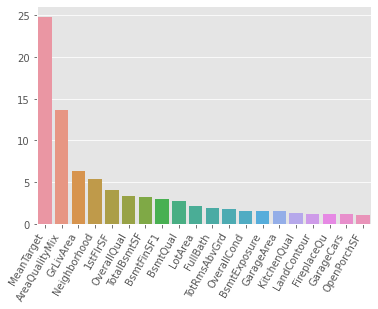

In [2598]:
bar = sns.barplot(x=list(map(lambda x: x[0], feat_dict))[:20], \
           y=list(map(lambda x: x[1], feat_dict))[:20]);
labels = list(map(lambda x: x[0], feat_dict))[:20]
bar.set_xticklabels(labels, rotation=60, ha='right');

In [2599]:
data_subm['SalePrice'] = y_pred
data_subm.to_csv(PATH + 'submission_ctb.csv', index=False)